Importing libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.express as px

Reading dataset

In [60]:
df = pd.read_csv('test-Minimum-Error-Rate-Classifier.txt', delimiter = ',',header = None)
# store dataframe into csv file
df.to_csv('test-Minimum-Error-Rate-Classifier.csv', index = None)

In [61]:
df

,0,1
0,1,1.0
1,1,-1.0
2,4,5.0
3,-2,2.5
4,0,2.0
5,2,-3.0


In [62]:
x = np.array(df.iloc[:,0:2],dtype="float64")
x

array([[ 1. ,  1. ],
       [ 1. , -1. ],
       [ 4. ,  5. ],
       [-2. ,  2.5],
       [ 0. ,  2. ],
       [ 2. , -3. ]])

Initializing values

In [63]:
m1 = np.array([[0,0]],dtype="float64")
E1 = np.array([[0.25,0.3],[0.3,1]],dtype="float64")
m2 = np.array([[2,2]],dtype="float64")
E2 = np.array([[0.5,0],[0,0.5]],dtype="float64")
w1 = 0.5
w2 = 0.5

Functions for Normal Distribution Calculation

In [64]:
from numpy.linalg import multi_dot
def ndf1Cal(xi):
  return np.exp(-0.5*multi_dot([(xi-m1) ,np.linalg.inv(E1) , np.transpose(xi-m1)])) / np.sqrt( np.power(2*np.pi,2) * np.linalg.det(E1) ) * w1

def ndf2Cal(xi):
  return np.exp(-0.5*multi_dot([(xi-m2) ,np.linalg.inv(E2) , np.transpose(xi-m2)])) / np.sqrt( np.power(2*np.pi,2) * np.linalg.det(E2) ) * w2


1. Classifying the sample points from “test.txt”. After classification the result is stored in wclass sequentially.

In [65]:
x1=[]
x2=[]
wclass = []
pdf1 = []
pdf2 = []

for i in range(0,6):
  temp1 = ndf1Cal(x[i,:])
  temp2 = ndf2Cal(x[i,:])
  if temp1>temp2:
    wclass.append("1")
    x1.append(x[i,:])
  else:
    wclass.append("2")
    x2.append(x[i,:])

  temp3 = (temp1/0.5)
  temp4 = (temp2/0.5)

  if temp3>temp4:
    pdf1.append(temp3)
  else:
    pdf2.append(temp4)

x1 = np.array(x1)
x2 = np.array(x2)
pdf1 = np.array(pdf1)
pdf2 = np.array(pdf2)

In [66]:
wclass

['1', '1', '2', '2', '1', '2']

2. Plotting class 1 points as red and 2 as blue

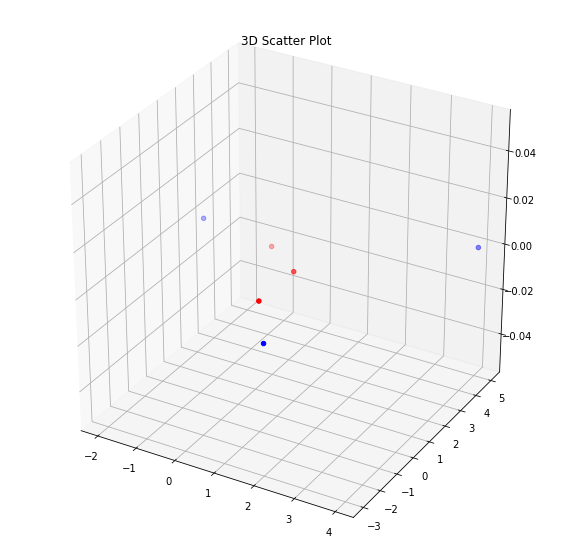

In [67]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(x1[:,0],x1[:,1],c='red')
ax.scatter(x2[:,0],x2[:,1],c='blue')
ax.set_title('3D Scatter Plot')

plt.show()

Assigning points for plotting the pdf

In [68]:
pointsX1 = np.linspace(-6, 6, 500)
pointsX2 = np.linspace(-6, 6, 500)
pointsPDF1 = np.zeros((500, 500))
pointsPDF2 = np.zeros((500, 500))

for i in range(len(pointsX1)):
  for j in range(len(pointsX2)):
    temp = []
    temp.append(pointsX1[i]) 
    temp.append(pointsX2[j]) 
    nm1 = ndf1Cal(np.array(temp))
    nm2 = ndf2Cal(np.array(temp))

    pointsPDF1[i][j] = nm1[0]
    pointsPDF2[i][j] = nm2[0]

3. Plotting figure including the points with their corresponding probability distribution function
along with its contour :

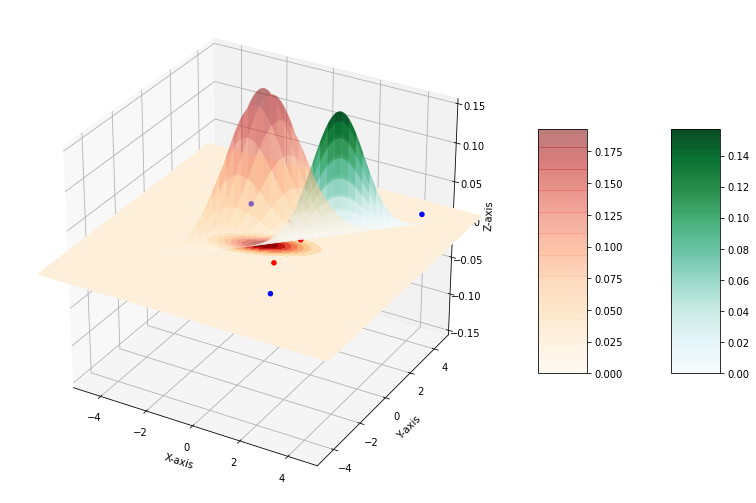

In [71]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')

# Creating color map
my_cmap = plt.get_cmap('BuGn')

# Creating plot
surf = ax.plot_surface(pointsX1,pointsX2,pointsPDF2, rstride = 8, cstride = 8, alpha = 0.8, cmap = my_cmap, edgecolor='none')
cset = ax.contourf(pointsX1,pointsX2,pointsPDF2,zdir ='pointsPDF2',offset = np.min(pointsPDF2),cmap = my_cmap)
cset = ax.contourf(pointsX1,pointsX2,pointsPDF2,zdir ='pointsX1',offset =-5,cmap = my_cmap)
cset = ax.contourf(pointsX1,pointsX2,pointsPDF2,zdir ='pointsX2',offset = 5,cmap = my_cmap)
fig.colorbar(surf, ax = ax,shrink = 0.5,aspect = 5)

# Creating color map
my_cmap = plt.get_cmap('OrRd')

# Creating plot
surf = ax.plot_surface(pointsX1,pointsX2,pointsPDF1, rstride = 8, cstride = 8, alpha = 0.3, cmap = my_cmap, edgecolor='none')
cset = ax.contourf(pointsX1,pointsX2,pointsPDF1,zdir ='pointsPDF1',offset = np.min(pointsPDF1),cmap = my_cmap)
cset = ax.contourf(pointsX1,pointsX2,pointsPDF1,zdir ='pointsX1',offset =-5,cmap = my_cmap)
cset = ax.contourf(pointsX1,pointsX2,pointsPDF1,zdir ='pointsX2',offset = 5,cmap = my_cmap)
fig.colorbar(surf, ax = ax,shrink = 0.5,aspect = 5)

# Adding labels
ax.set_xlabel('X-axis')
ax.set_xlim(-5, 5)
ax.set_ylabel('Y-axis')
ax.set_ylim(-5, 5)
ax.set_zlabel('Z-axis')
ax.set_zlim(-0.15,0.15)

ax.scatter(x1[:,0],x1[:,1],c='red',alpha=1.0)
ax.scatter(x2[:,0],x2[:,1],c='blue',alpha=1.0)

# show plot
plt.show()


Identifying the points that satisfy the decision boundary equation 
log(p(x|ω1)) − log(p(x|ω2)) = log(P(ω2)) − log(P(ω1))
and storing its co ordinates in db1 and db2 respectively.

In [70]:
db1 = []
db2 = []
for i in range(len(pointsX1)):
  for j in range(len(pointsX2)):
    temp = []
    temp.append(pointsX1[i]) 
    temp.append(pointsX2[j]) 
    nm1 = ndf1Cal(np.array(temp))
    nm2 = ndf2Cal(np.array(temp))
    if abs((np.log10(nm1[0]) - np.log10(nm2[0])) - np.log10(0.5) + np.log10(0.5)) < 0.1:
      db1.append(pointsX1[i])
      db2.append(pointsX2[i])

4. Drawing decision boundary

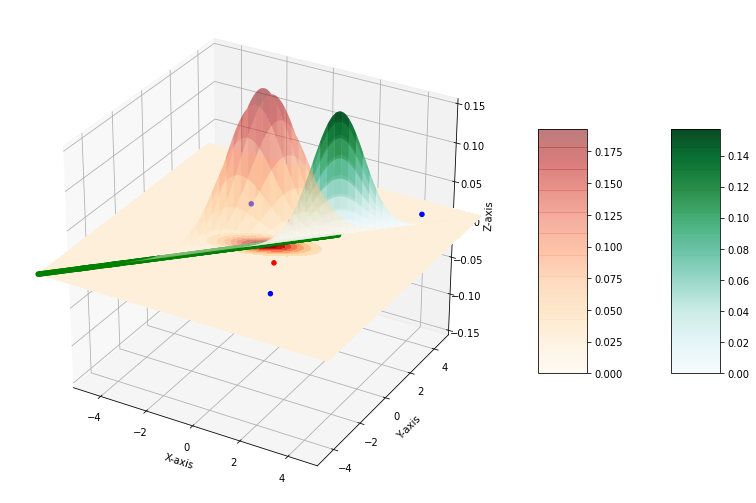

In [72]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')

# Creating color map
my_cmap = plt.get_cmap('BuGn')

# Creating plot
surf = ax.plot_surface(pointsX1,pointsX2,pointsPDF2, rstride = 8, cstride = 8, alpha = 0.8, cmap = my_cmap, edgecolor='none')
cset = ax.contourf(pointsX1,pointsX2,pointsPDF2,zdir ='pointsPDF2',offset = np.min(pointsPDF2),cmap = my_cmap)
cset = ax.contourf(pointsX1,pointsX2,pointsPDF2,zdir ='pointsX1',offset =-5,cmap = my_cmap)
cset = ax.contourf(pointsX1,pointsX2,pointsPDF2,zdir ='pointsX2',offset = 5,cmap = my_cmap)
fig.colorbar(surf, ax = ax,shrink = 0.5,aspect = 5)

# Creating color map
my_cmap = plt.get_cmap('OrRd')

# Creating plot
surf = ax.plot_surface(pointsX1,pointsX2,pointsPDF1, rstride = 8, cstride = 8, alpha = 0.3, cmap = my_cmap, edgecolor='none')
cset = ax.contourf(pointsX1,pointsX2,pointsPDF1,zdir ='pointsPDF1',offset = np.min(pointsPDF1),cmap = my_cmap)
cset = ax.contourf(pointsX1,pointsX2,pointsPDF1,zdir ='pointsX1',offset =-5,cmap = my_cmap)
cset = ax.contourf(pointsX1,pointsX2,pointsPDF1,zdir ='pointsX2',offset = 5,cmap = my_cmap)
fig.colorbar(surf, ax = ax,shrink = 0.5,aspect = 5)

# Adding labels
ax.set_xlabel('X-axis')
ax.set_xlim(-5, 5)
ax.set_ylabel('Y-axis')
ax.set_ylim(-5, 5)
ax.set_zlabel('Z-axis')
ax.set_zlim(-0.15,0.15)

ax.scatter(x1[:,0],x1[:,1],c='red',alpha=1.0)
ax.scatter(x2[:,0],x2[:,1],c='blue',alpha=1.0)

ax.scatter(db1,db2,c='green')

# show plot
plt.show()
